# CRAPS



O CRAPS é um jogo de dados (famoso em cassinos), em que o jogador lança dois dados, então soma-se as faces dos dados:

- Se a soma for **7 ou 11** na primeira rodada, o *`jogador ganha`*;
- Se for **2, 3 ou 12** na primeira rodada (ou CRAPS) o *`jogador perde`*.   
- Se a soma for **4, 5, 6, 8, 9 ou 10** na primeira rodada. Então esta soma se torna o ponto do jogador. 
  - Para ganhar, o jogador continua jogando o dado até a soma ser igual a seu ponto. 
  - O jogador perde se a soma for igual a 7.

In [24]:
# Importações necessárias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Função responsável por rolar dados
def roll_dice():
    """Função que rola dois dados.

    Returns:
        tuple: retorno é uma tupla com o resultado empacotado.
    """
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)

In [12]:
# Função que mostra o valor dos dados
def display_dice(dice):
    """Exibe na tela os dados e a respectiva soma.

    Args:
        dice (tuple): Uma tupla com valor de cada dado sorteado.
    """
    die1, die2 = dice
    print(f'Result: {die1} + {die2} = {sum(dice)}')

In [64]:
# Função do jogo CRAPS
def craps():
    """Função que realiza uma rodada do jogo CRAPS7

    Returns: 
        tuple: 1º - round em que ganhou ou perdeu; 2º - vitória ou derrota.
    """

    die_values = roll_dice()  # primeira rodada
    # display_dice(die_values)

    sum_dies = sum(die_values)

    counter = 1

    if sum_dies in (7, 11):  # condição de vitória
        game_status = 'WON'
    elif sum_dies in (2, 3, 12):  # condição de derrota
        game_status = 'LOSE'
    else:  # segue o jogo
        game_status = 'CONTINUE'
        player_point = sum_dies
        # print(f'My point is {player_point}')

    # looping até chegar condição de vitoria ou derrota
    while game_status == 'CONTINUE':
        die_values = roll_dice()  # outras rodadas
        # display_dice(die_values)
        sum_dies = sum(die_values)

        if counter > 12:
            counter = 13
        else:
            counter += 1

        if sum_dies == player_point:
            game_status = 'WON'
        elif sum_dies == 7:
            game_status = 'LOSE'

    # Mensagem de vitória ou derrota
    if game_status == 'WON':
        # print(f'Congratulations, you WIN in {counter}º round!')
        return (counter, game_status)
    else:
        # print(f'You LOSE in {counter}º round, try again!')
        return (counter, game_status)

## Início das análises

- Exibir um gráfico de barra horizontal indicando quantos jogos foram ganhos e quanto foram perdidos no primeiro lançamento, segundo lançamento, terceiro lançamento, etc. Uma vez que o jogo poderia continuar indefinidamente, você pode acompanhar as vitórias e derrotas na primeira dúzia lançamentos, em seguida, manter dois contadores que controlam as vitórias e perdas após 12 lançamentos - não importa quanto tempo o jogo leve. Crie barras separadas para vitórias e derrotas.

- Quais são as chances de ganhar no craps? `[Nota: Você deve descobrir que craps é um dos jogos de casino mais justos. O que você acha que isso significa?]`

- Qual é a média para a duração de um jogo de dados? A mediana? O modo?
As chances de vitória aumentam com a duração do jogo?

In [242]:
games = [craps() for i in range(100000)]

In [243]:
df = pd.DataFrame(games, columns=["ROUND", "STATUS"])
df.head()

,ROUND,STATUS
0,5,LOSE
1,1,WON
2,4,WON
3,3,LOSE
4,1,WON


In [244]:
# Ordenando dataframe
df.sort_values('ROUND', inplace=True)

In [247]:
df = df.astype({"ROUND": str})

In [248]:
df.dtypes

ROUND     object
STATUS    object
dtype: object

In [252]:
df['ROUND'] = df['ROUND'].replace(['13'], '13+')

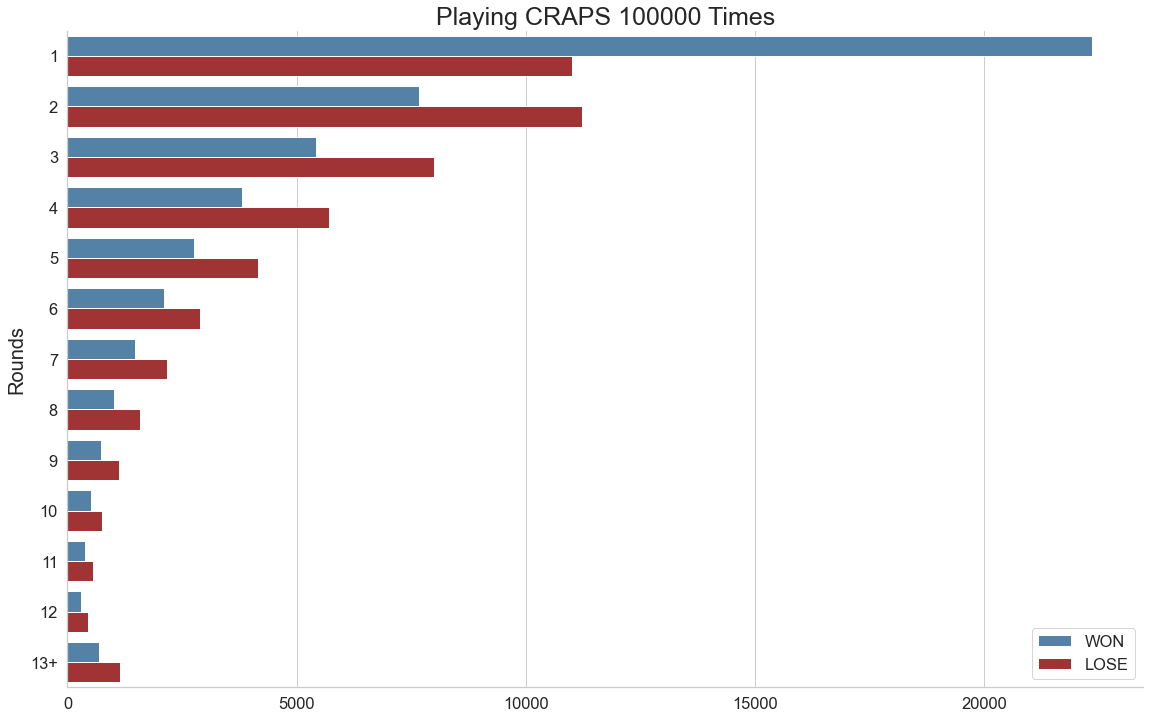

In [297]:
title = f'Playing CRAPS {len(games)} Times'
custom_palette = ["#4682B4", "#B22222"]

sns.set_style("whitegrid")
sns.set_palette(custom_palette)
sns.set_context("notebook", font_scale=1.5)

g = sns.catplot(y='ROUND', data=df, hue='STATUS', height=10, aspect=1.6, legend_out=False, margin_titles=True, kind='count')

plt.title(title, fontsize=25)
plt.ylabel('Rounds', fontsize=20)
plt.xlabel("")
plt.legend()


plt.show()